# Optimal new generation - summary

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


Bad key legend.labelcolor in file style.txt, line 43 ('legend.labelcolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


### Notebook constants

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                 's15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25']
savefig = False
folder_to_save_results="results_v2/"

figure_names={'s1':1,'s2':2,'s3':3,'s4':4,'s5':5,'s6':6,'s7':7,'s8':8,'s9':9,'s10':10,'s11':11,'s12':12,'s13':13,
              's14':14,'s15':15,'s16':16,'s17':17,'s18':18,'s19':19,'s20':20,'s21':21,'s22':22,'s23':23,'s24':24,
              's25':25}

In [3]:
columns = ["timepoint", "timestamp", "hours_per_year"]
fname = "timestamps.csv"
#tps = get_data(scenario_name, fname)
tps = get_data_sftp(hostname, username, scenario_name, fname)


In [39]:
# Read timeseries 
columns = ['TIMESERIES','ts_period','ts_duration_of_tp','ts_num_tps,ts_scale_to_period']
fname = "timeseries.csv"

tmss = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs")

In [40]:
tmss['tp_weight'] = tmss.apply(lambda x: x['ts_duration_of_tp']*x['ts_scale_to_period'], axis=1)
tmss

,TIMESERIES,ts_period,ts_duration_of_tp,ts_num_tps,ts_scale_to_period,scenario,tp_weight
0,2050_2050-01-13,2050,4.00,6,20.28,s1,81.11
1,2050_2050-01-21,2050,4.00,6,283.89,s1,"1,135.56"
2,2050_2050-02-22,2050,4.00,6,20.28,s1,81.11
3,2050_2050-02-25,2050,4.00,6,283.89,s1,"1,135.56"
4,2050_2050-03-02,2050,4.00,6,20.28,s1,81.11
...,...,...,...,...,...,...,...
91,2020_2020-10-31,2020,4.00,6,20.28,s25,81.11
92,2020_2020-11-07,2020,4.00,6,283.89,s25,"1,135.56"
93,2020_2020-11-29,2020,4.00,6,20.28,s25,81.11
94,2020_2020-12-14,2020,4.00,6,283.89,s25,"1,135.56"


In [42]:
tmss["datetime"] = pd.to_datetime(tmss["TIMESERIES"], format="%Y_%Y-%m-%d")
tmss

error: redefinition of group name 'Y' as group 2; was group 1 at position 20

In [4]:
# Read timepoints to aggregate data by year
columns = ["timepoint", "timestamp", "hours_per_year"]
fname = "timestamps.csv"
#tps = get_data(scenario_name, fname)
tps = get_data_sftp(hostname, username, scenario_name, fname)
del tps["scenario"]

# Read load data
fname = "loads.csv"
#load = get_data(scenario_name, fname, fpath="inputs")
load = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs")
del load["scenario"]

# Combine dataset
load = pd.merge(
    left=load,
    right=tps,
    left_on="TIMEPOINT",
    right_on="timepoint",
   # validate="many_to_one",
    how="left",
)
load["datetime"] = pd.to_datetime(load["timestamp"], format="%Y%m%d%H")
# Filter columns
load = load[["LOAD_ZONE", "zone_demand_mw", "hours_per_year", "datetime"]]



In [5]:
tps = tps[tps['period'] == 2050]
tps

,timepoint,timestamp,hours_per_year,timeseries,period
432,350931,2050011303,8.11,2050_2050-01-13,2050
433,350935,2050011307,8.11,2050_2050-01-13,2050
434,350939,2050011311,8.11,2050_2050-01-13,2050
435,350943,2050011315,8.11,2050_2050-01-13,2050
436,350947,2050011319,8.11,2050_2050-01-13,2050
...,...,...,...,...,...
571,359143,2050122107,8.11,2050_2050-12-21,2050
572,359147,2050122111,8.11,2050_2050-12-21,2050
573,359151,2050122115,8.11,2050_2050-12-21,2050
574,359155,2050122119,8.11,2050_2050-12-21,2050


In [6]:
load = load[load['datetime'].dt.year == 2050]
load

,LOAD_ZONE,zone_demand_mw,hours_per_year,datetime
10800,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00
10801,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00
10802,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00
10803,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00
10804,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00
...,...,...,...,...
17999995,WY_SW,238.21,8.11,2050-12-21 23:00:00
17999996,WY_SW,238.21,8.11,2050-12-21 23:00:00
17999997,WY_SW,238.21,8.11,2050-12-21 23:00:00
17999998,WY_SW,238.21,8.11,2050-12-21 23:00:00


In [7]:
fname = "dispatch_zonal_annual_summary.csv"

#annual_summary = get_data(scenario_name, fname)
annual_summary = get_data_sftp(hostname, username, scenario_name, fname)
annual_summary = annual_summary[annual_summary['period']==2050]
annual_summary

,gen_tech,gen_load_zone,gen_energy_source,period,Energy_GWh_typical_yr,VariableOMCost_per_yr,DispatchEmissions_tCO2_per_typical_yr,DispatchEmissions_tNOx_per_typical_yr,DispatchEmissions_tSO2_per_typical_yr,DispatchEmissions_tCH4_per_typical_yr,tech_map,scenario
3,Battery_Storage,AZ_APS_E,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,s1
7,Battery_Storage,AZ_APS_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,s1
11,Battery_Storage,AZ_APS_SW,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,s1
15,Battery_Storage,AZ_NM_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,s1
19,Battery_Storage,AZ_NW,Electricity,2050,"3,299.50",0.00,0.00,0,0,0,Storage,s1
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Wind,WA_W,Wind,2050,263.43,0.00,0.00,0,0,0,Wind,s25
3026,Wind,WY_NE,Wind,2050,"1,606.70",0.00,0.00,0,0,0,Wind,s25
3030,Wind,WY_NW,Wind,2050,"7,116.10",0.00,0.00,0,0,0,Wind,s25
3034,Wind,WY_SE,Wind,2050,"199,310.00",0.00,0.00,0,0,0,Wind,s25


## Data transformation

In [8]:
# Convert online capacity to GW
# Note this value is already scaled
annual_summary["Energy_TWh"] = annual_summary["Energy_GWh_typical_yr"] / 1e3  # GW to TW

# Scaled load
load["zone_demand_MW_scaled"] = load["zone_demand_mw"] * load["hours_per_year"]

In [9]:
total_load_MWh = load["zone_demand_MW_scaled"].sum()
total_load_TWh = total_load_MWh / 1e6
load

,LOAD_ZONE,zone_demand_mw,hours_per_year,datetime,zone_demand_MW_scaled
10800,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00,"2,872.32"
10801,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00,"2,872.32"
10802,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00,"2,872.32"
10803,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00,"2,872.32"
10804,AZ_APS_E,354.12,8.11,2050-01-13 03:00:00,"2,872.32"
...,...,...,...,...,...
17999995,WY_SW,238.21,8.11,2050-12-21 23:00:00,"1,932.13"
17999996,WY_SW,238.21,8.11,2050-12-21 23:00:00,"1,932.13"
17999997,WY_SW,238.21,8.11,2050-12-21 23:00:00,"1,932.13"
17999998,WY_SW,238.21,8.11,2050-12-21 23:00:00,"1,932.13"


In [10]:
total_load_TWh

924400.9383559559

## Annual generation in WECC

In [11]:
annual_summary = annual_summary.replace({"scenario": figure_names})
annual_summary = annual_summary.astype({'scenario':'int'})

In [12]:
annual_summary

,gen_tech,gen_load_zone,gen_energy_source,period,Energy_GWh_typical_yr,VariableOMCost_per_yr,DispatchEmissions_tCO2_per_typical_yr,DispatchEmissions_tNOx_per_typical_yr,DispatchEmissions_tSO2_per_typical_yr,DispatchEmissions_tCH4_per_typical_yr,tech_map,scenario,Energy_TWh
3,Battery_Storage,AZ_APS_E,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,1,0.00
7,Battery_Storage,AZ_APS_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,1,0.00
11,Battery_Storage,AZ_APS_SW,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,1,0.00
15,Battery_Storage,AZ_NM_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,1,0.00
19,Battery_Storage,AZ_NW,Electricity,2050,"3,299.50",0.00,0.00,0,0,0,Storage,1,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Wind,WA_W,Wind,2050,263.43,0.00,0.00,0,0,0,Wind,25,0.26
3026,Wind,WY_NE,Wind,2050,"1,606.70",0.00,0.00,0,0,0,Wind,25,1.61
3030,Wind,WY_NW,Wind,2050,"7,116.10",0.00,0.00,0,0,0,Wind,25,7.12
3034,Wind,WY_SE,Wind,2050,"199,310.00",0.00,0.00,0,0,0,Wind,25,199.31


In [13]:
annual_summary_by_scenario = annual_summary.pivot_table(
    index="scenario", columns="tech_map", values="Energy_TWh", aggfunc=np.sum
)
annual_summary_by_scenario = annual_summary_by_scenario#.fillna(0)
annual_summary_by_scenario.loc[:,'Total_TWh']=annual_summary_by_scenario.apply(lambda x: sum(x[c] for c in annual_summary_by_scenario.columns), axis=1)
annual_summary_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
1,15.41,0.00,0.00,6.45,237.84,42.76,12.49,2.71,813.59,337.17,0.04,9.69,492.56,"1,970.71"
2,15.41,0.00,0.00,6.45,237.84,42.76,12.47,2.71,810.34,334.46,0.04,20.47,484.19,"1,967.14"
3,15.41,0.00,0.00,6.45,237.84,42.76,12.32,2.71,796.16,328.40,0.04,37.87,480.07,"1,960.02"
4,15.43,0.00,0.00,6.45,237.84,42.76,11.55,2.71,757.81,313.36,0.04,74.93,476.55,"1,939.43"
5,15.43,0.00,0.00,6.45,237.84,42.76,11.48,2.71,750.13,313.21,0.04,83.07,477.30,"1,940.43"
6,15.41,0.00,0.00,6.45,237.84,42.76,15.88,2.71,806.98,334.73,0.04,9.58,495.50,"1,967.89"
7,15.41,0.00,0.00,6.45,237.84,42.76,15.50,2.71,800.84,334.59,0.04,20.29,491.01,"1,967.45"
8,15.41,0.00,0.00,6.45,237.84,42.76,15.16,2.71,787.63,327.98,0.04,37.30,485.98,"1,959.25"
9,15.43,0.00,0.00,6.45,237.84,42.76,14.46,2.71,760.82,315.43,0.04,74.93,471.88,"1,942.75"


In [14]:
sc= list(annual_summary_by_scenario.index)
plot_1=sc[0:5]
plot_2=sc[5:10]
plot_3=sc[10:15]
plot_4=sc[15:20]
plot_5=sc[20:25]
group_1 = annual_summary_by_scenario.loc[plot_1,:]
group_2 = annual_summary_by_scenario.loc[plot_2,:]
group_3 = annual_summary_by_scenario.loc[plot_3,:]
group_4 = annual_summary_by_scenario.loc[plot_4,:]
group_5 = annual_summary_by_scenario.loc[plot_5,:]

# sc= list(annual_summary_by_scenario.index)
# p0 = sc[0]
# plot_1=sc[0:int(round(len(sc)/2,0))]
# plot_2=[p0]+ sc[int(round(len(sc)/2,0)):int(len(sc))]
# group_1 = annual_summary_by_scenario.loc[plot_1,:]
# group_2 = annual_summary_by_scenario.loc[plot_2,:]

In [15]:
group_5

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
21,15.15,0.00,0.00,0.00,237.84,42.76,230.03,2.71,576.86,235.97,0.05,6.95,496.45,"1,844.77"
22,15.15,0.00,0.00,0.00,237.84,42.76,227.90,2.71,578.50,235.53,0.05,7.22,496.85,"1,844.51"
23,15.16,0.00,0.00,0.00,237.84,42.76,222.33,2.71,563.86,232.88,0.05,18.36,504.44,"1,840.39"
24,15.15,0.00,0.00,0.00,237.84,42.76,206.60,2.71,551.43,228.91,0.04,51.18,498.42,"1,835.04"
25,14.72,0.00,0.00,0.00,237.84,42.76,188.99,2.71,567.13,230.30,0.04,73.08,478.43,"1,836.01"


<ipython-input-16-2c3f591a31fd>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
1,15.41,0.00,0.00,6.45,237.84,42.76,12.49,2.71,813.59,337.17,0.04,9.69,492.56,"1,970.71"
2,15.41,0.00,0.00,6.45,237.84,42.76,12.47,2.71,810.34,334.46,0.04,20.47,484.19,"1,967.14"
3,15.41,0.00,0.00,6.45,237.84,42.76,12.32,2.71,796.16,328.40,0.04,37.87,480.07,"1,960.02"
4,15.43,0.00,0.00,6.45,237.84,42.76,11.55,2.71,757.81,313.36,0.04,74.93,476.55,"1,939.43"
5,15.43,0.00,0.00,6.45,237.84,42.76,11.48,2.71,750.13,313.21,0.04,83.07,477.30,"1,940.43"
6,15.41,0.00,0.00,6.45,237.84,42.76,15.88,2.71,806.98,334.73,0.04,9.58,495.50,"1,967.89"
7,15.41,0.00,0.00,6.45,237.84,42.76,15.50,2.71,800.84,334.59,0.04,20.29,491.01,"1,967.45"
8,15.41,0.00,0.00,6.45,237.84,42.76,15.16,2.71,787.63,327.98,0.04,37.30,485.98,"1,959.25"
9,15.43,0.00,0.00,6.45,237.84,42.76,14.46,2.71,760.82,315.43,0.04,74.93,471.88,"1,942.75"


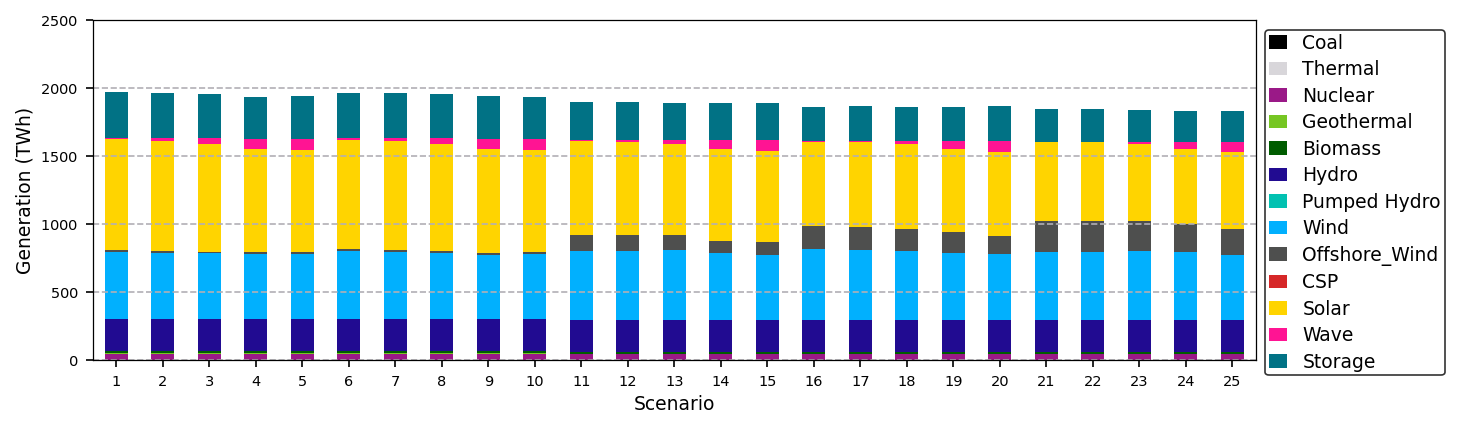

In [16]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = annual_summary_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC.png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Annual generation (TWh) in WECC")

#Show dataframe
annual_summary_by_scenario

<ipython-input-17-1ac5e4c23daf>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 1-5).tex",index=True,


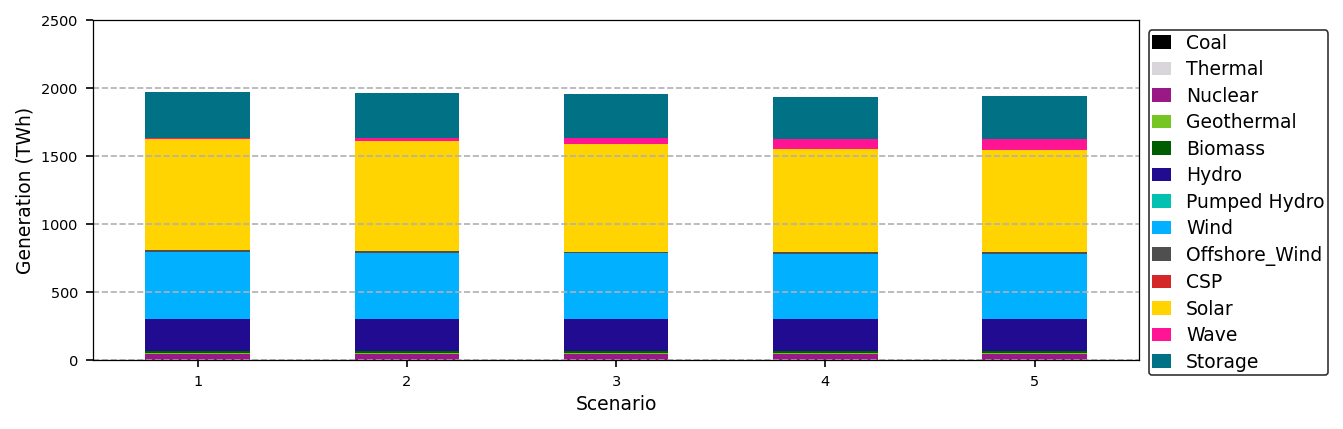

In [17]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_1[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 1-5).png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 1-5).tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in WECC (scenarios 1-5)")

#Show dataframe
group_1
fig.savefig('gen_scen_1to5.svg', format='svg', dpi=1200)

<ipython-input-18-7ef330034de4>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 6-10).tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
6,15.41,0.00,0.00,6.45,237.84,42.76,15.88,2.71,806.98,334.73,0.04,9.58,495.50,"1,967.89"
7,15.41,0.00,0.00,6.45,237.84,42.76,15.50,2.71,800.84,334.59,0.04,20.29,491.01,"1,967.45"
8,15.41,0.00,0.00,6.45,237.84,42.76,15.16,2.71,787.63,327.98,0.04,37.30,485.98,"1,959.25"
9,15.43,0.00,0.00,6.45,237.84,42.76,14.46,2.71,760.82,315.43,0.04,74.93,471.88,"1,942.75"
10,15.43,0.00,0.00,6.45,237.84,42.76,14.99,2.71,747.33,311.15,0.04,82.34,475.60,"1,936.64"


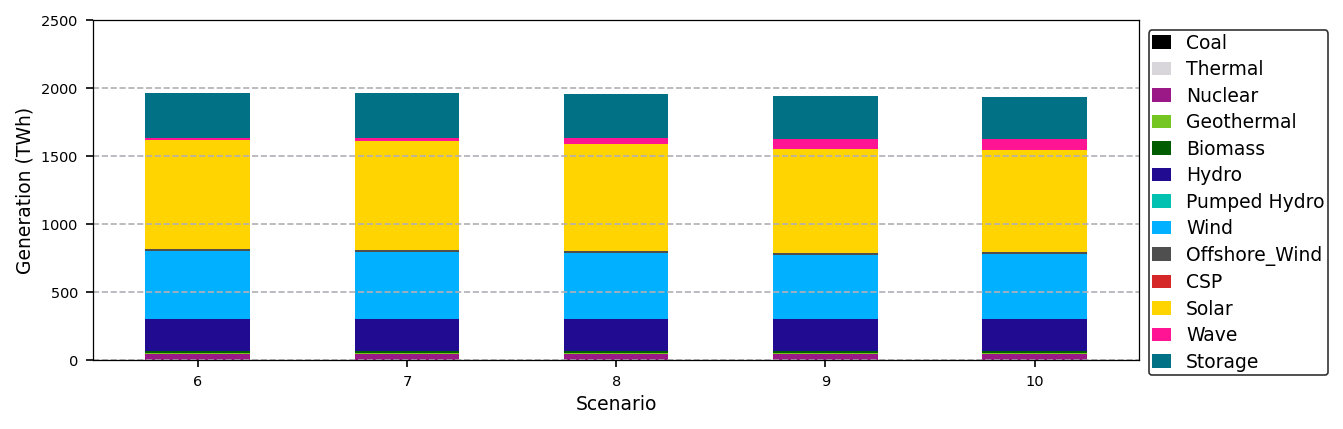

In [18]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_2[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 6-10).png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 6-10).tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in WECC (scenarios 6-10)")

#vectorized image
fig.savefig('gen_scen_6to10.svg', format='svg', dpi=1200)

#Show dataframe
group_2

<ipython-input-19-53198270434c>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 11-15).tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
11,15.41,0.00,0.00,0.00,237.84,42.76,119.38,2.71,689.62,279.41,0.04,7.97,502.86,"1,898.02"
12,15.41,0.00,0.00,0.00,237.84,42.76,116.28,2.71,682.36,277.76,0.04,14.47,506.75,"1,896.39"
13,15.41,0.00,0.00,0.00,237.84,42.76,109.19,2.71,671.01,276.89,0.04,29.81,510.29,"1,895.95"
14,15.41,0.00,0.00,0.00,237.84,42.76,94.44,2.71,673.10,276.79,0.04,64.91,486.96,"1,894.97"
15,15.38,0.00,0.00,0.00,237.84,42.76,90.63,2.71,668.89,275.45,0.04,82.85,477.33,"1,893.89"


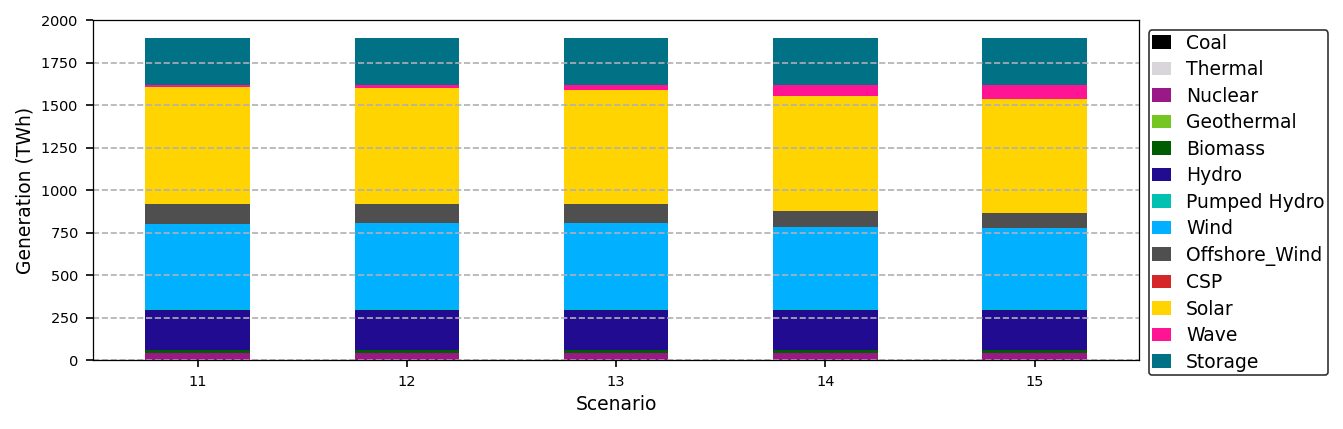

In [19]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_3[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 11-15).png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 11-15).tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in WECC (scenarios 11-15)")

#vectorized image
fig.savefig('gen_scen_11to15.svg', format='svg', dpi=1200)

#Show dataframe
group_3

<ipython-input-20-8fa773be66c9>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 16-20).tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
16,15.36,0.00,0.00,0.00,237.84,42.76,172.98,2.71,616.72,252.47,0.04,7.55,517.23,"1,865.67"
17,15.36,0.00,0.00,0.00,237.84,42.76,172.15,2.71,622.64,253.70,0.04,9.55,510.76,"1,867.52"
18,15.33,0.00,0.00,0.00,237.84,42.76,166.74,2.71,620.35,252.14,0.04,24.63,502.27,"1,864.82"
19,15.25,0.00,0.00,0.00,237.84,42.76,152.15,2.71,615.20,248.89,0.04,54.75,491.16,"1,860.76"
20,15.20,0.00,0.00,0.00,237.84,42.76,133.46,2.71,614.91,253.92,0.04,81.05,484.69,"1,866.59"


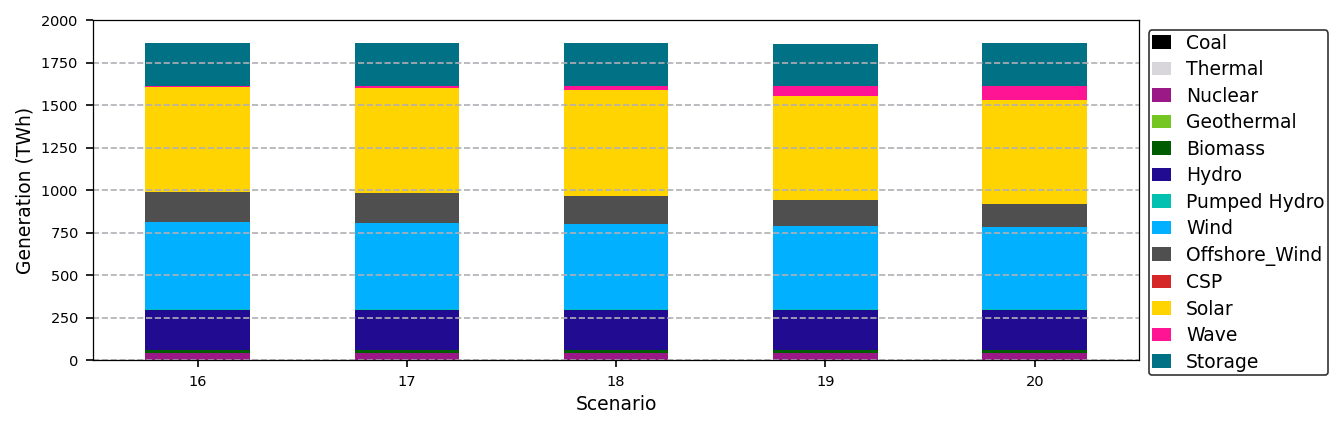

In [20]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_4[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 16-20).png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 16-20).tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in WECC (scenarios 16-20)")

#vectorized image
fig.savefig('gen_scen_16to20.svg', format='svg', dpi=1200)

#Show dataframe
group_4

<ipython-input-21-d56edf89a67f>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 21-25).tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
21,15.15,0.00,0.00,0.00,237.84,42.76,230.03,2.71,576.86,235.97,0.05,6.95,496.45,"1,844.77"
22,15.15,0.00,0.00,0.00,237.84,42.76,227.90,2.71,578.50,235.53,0.05,7.22,496.85,"1,844.51"
23,15.16,0.00,0.00,0.00,237.84,42.76,222.33,2.71,563.86,232.88,0.05,18.36,504.44,"1,840.39"
24,15.15,0.00,0.00,0.00,237.84,42.76,206.60,2.71,551.43,228.91,0.04,51.18,498.42,"1,835.04"
25,14.72,0.00,0.00,0.00,237.84,42.76,188.99,2.71,567.13,230.30,0.04,73.08,478.43,"1,836.01"


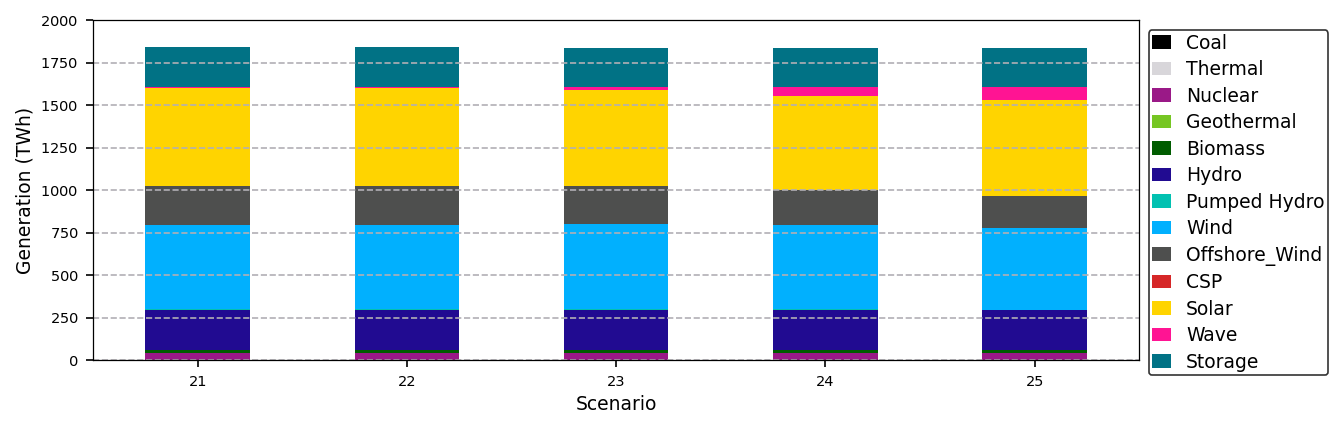

In [21]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_5[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 21-25).png", transparent=False)

#Rename for spaces purposes
data=annual_summary_by_scenario.rename(index=figure_names,inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in WECC (scenarios 21-25).tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in WECC (scenarios 21-25)")

#vectorized image
fig.savefig('gen_scen_21to25.svg', format='svg', dpi=1200)

#Show dataframe
group_5

In [22]:
annual_summary_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total_TWh
scenario,,,,,,,,,,,,,,
1,15.41,0.00,0.00,6.45,237.84,42.76,12.49,2.71,813.59,337.17,0.04,9.69,492.56,"1,970.71"
2,15.41,0.00,0.00,6.45,237.84,42.76,12.47,2.71,810.34,334.46,0.04,20.47,484.19,"1,967.14"
3,15.41,0.00,0.00,6.45,237.84,42.76,12.32,2.71,796.16,328.40,0.04,37.87,480.07,"1,960.02"
4,15.43,0.00,0.00,6.45,237.84,42.76,11.55,2.71,757.81,313.36,0.04,74.93,476.55,"1,939.43"
5,15.43,0.00,0.00,6.45,237.84,42.76,11.48,2.71,750.13,313.21,0.04,83.07,477.30,"1,940.43"
6,15.41,0.00,0.00,6.45,237.84,42.76,15.88,2.71,806.98,334.73,0.04,9.58,495.50,"1,967.89"
7,15.41,0.00,0.00,6.45,237.84,42.76,15.50,2.71,800.84,334.59,0.04,20.29,491.01,"1,967.45"
8,15.41,0.00,0.00,6.45,237.84,42.76,15.16,2.71,787.63,327.98,0.04,37.30,485.98,"1,959.25"
9,15.43,0.00,0.00,6.45,237.84,42.76,14.46,2.71,760.82,315.43,0.04,74.93,471.88,"1,942.75"


In [23]:
annual_summary_by_scenario.to_csv('annual_summary_by_scenario.csv')

In [24]:
techs = annual_summary['tech_map'].unique()
annual_summary_by_scenario_percentage = annual_summary_by_scenario.copy()
for t in techs:
    annual_summary_by_scenario_percentage.loc[:,t] = annual_summary_by_scenario_percentage.apply(lambda x:x[t]*100/x['Total_TWh'], axis=1)
annual_summary_by_scenario_percentage.drop(columns='Total_TWh', axis=1, inplace=True)

annual_summary_by_scenario_percentage.loc[:,'Total']=annual_summary_by_scenario_percentage.apply(lambda x: sum(x[c] for c in annual_summary_by_scenario_percentage.columns), axis=1)
annual_summary_by_scenario_percentage.T.to_latex(folder_to_save_results+"Annual generation (percentage) in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Annual generation (percentage) in WECC")
annual_summary_by_scenario_percentage

<ipython-input-24-984d87a46042>:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  annual_summary_by_scenario_percentage.T.to_latex(folder_to_save_results+"Annual generation (percentage) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total
scenario,,,,,,,,,,,,,,
1,0.78,0.00,0.00,0.33,12.07,2.17,0.63,0.14,41.28,17.11,0.00,0.49,24.99,100.00
2,0.78,0.00,0.00,0.33,12.09,2.17,0.63,0.14,41.19,17.00,0.00,1.04,24.61,100.00
3,0.79,0.00,0.00,0.33,12.13,2.18,0.63,0.14,40.62,16.75,0.00,1.93,24.49,100.00
4,0.80,0.00,0.00,0.33,12.26,2.20,0.60,0.14,39.07,16.16,0.00,3.86,24.57,100.00
5,0.80,0.00,0.00,0.33,12.26,2.20,0.59,0.14,38.66,16.14,0.00,4.28,24.60,100.00
6,0.78,0.00,0.00,0.33,12.09,2.17,0.81,0.14,41.01,17.01,0.00,0.49,25.18,100.00
7,0.78,0.00,0.00,0.33,12.09,2.17,0.79,0.14,40.70,17.01,0.00,1.03,24.96,100.00
8,0.79,0.00,0.00,0.33,12.14,2.18,0.77,0.14,40.20,16.74,0.00,1.90,24.80,100.00
9,0.79,0.00,0.00,0.33,12.24,2.20,0.74,0.14,39.16,16.24,0.00,3.86,24.29,100.00


In [25]:
annual_summary_by_scenario_percentage.to_csv('annual_summary_by_scenario_percentage.csv')

## Annual generation in California

In [26]:
annual_gen_ca=annual_summary[annual_summary.gen_load_zone.str.startswith('CA_')]

annual_gen_ca_by_scenario = annual_gen_ca.pivot_table(
    index="scenario", columns="tech_map", values="Energy_TWh", aggfunc=np.sum )
annual_gen_ca_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind
scenario,,,,,,,,,,,,,
1,6.80,0.00,0.00,0.00,29.85,0.00,0.26,1.85,369.64,162.56,0.00,9.54,13.33
2,6.80,0.00,0.00,0.00,29.85,0.00,0.25,1.85,371.41,162.40,0.00,18.72,11.83
3,6.80,0.00,0.00,0.00,29.85,0.00,0.17,1.85,369.90,160.28,0.00,31.49,11.81
4,6.82,0.00,0.00,0.00,29.85,0.00,0.00,1.85,364.97,151.73,0.00,53.46,12.66
5,6.82,0.00,0.00,0.00,29.85,0.00,0.00,1.85,362.55,152.67,0.00,53.96,12.25
6,6.80,0.00,0.00,0.00,29.85,0.00,0.98,1.85,369.96,162.69,0.00,9.45,12.33
7,6.80,0.00,0.00,0.00,29.85,0.00,0.87,1.85,370.20,162.41,0.00,18.59,12.36
8,6.80,0.00,0.00,0.00,29.85,0.00,0.57,1.85,367.80,160.04,0.00,30.93,11.95
9,6.82,0.00,0.00,0.00,29.85,0.00,0.62,1.85,364.71,153.80,0.00,53.43,12.02


In [27]:
#Sort the pivot table by index according to the scenario_name
annual_gen_ca_by_scenario.columns = annual_gen_ca_by_scenario.columns.add_categories(['indexNumber'])
annual_gen_ca_by_scenario['indexNumber']=[scenario_name.index('s'+str(annual_gen_ca_by_scenario.index[i])) for i in range(0,len(scenario_name))]
annual_gen_ca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del annual_gen_ca_by_scenario['indexNumber']
annual_gen_ca_by_scenario.columns = annual_gen_ca_by_scenario.columns.add_categories(['total_TWh'])
annual_gen_ca_by_scenario['total_TWh']=[annual_gen_ca_by_scenario.sum(axis=1).iloc[i] for i in range(0,len(scenario_name))]


In [28]:
load_ca=load[load.LOAD_ZONE.str.startswith('CA_')]

total_load_ca_MWh = load_ca["zone_demand_MW_scaled"].sum()

total_load_ca_TWh = total_load_ca_MWh / 1e6

In [29]:
load_ca

,LOAD_ZONE,zone_demand_mw,hours_per_year,datetime,zone_demand_MW_scaled
111600,CA_IID,597.45,8.11,2050-01-13 03:00:00,"4,845.99"
111601,CA_IID,597.45,8.11,2050-01-13 03:00:00,"4,845.99"
111602,CA_IID,597.45,8.11,2050-01-13 03:00:00,"4,845.99"
111603,CA_IID,597.45,8.11,2050-01-13 03:00:00,"4,845.99"
111604,CA_IID,597.45,8.11,2050-01-13 03:00:00,"4,845.99"
...,...,...,...,...,...
17582395,CA_SMUD,"2,593.69",8.11,2050-12-21 23:00:00,"21,037.68"
17582396,CA_SMUD,"2,593.69",8.11,2050-12-21 23:00:00,"21,037.68"
17582397,CA_SMUD,"2,593.69",8.11,2050-12-21 23:00:00,"21,037.68"
17582398,CA_SMUD,"2,593.69",8.11,2050-12-21 23:00:00,"21,037.68"


In [30]:
annual_gen_ca_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario,,,,,,,,,,,,,,
1,6.80,0.00,0.00,0.00,29.85,0.00,0.26,1.85,369.64,162.56,0.00,9.54,13.33,593.84
2,6.80,0.00,0.00,0.00,29.85,0.00,0.25,1.85,371.41,162.40,0.00,18.72,11.83,603.12
3,6.80,0.00,0.00,0.00,29.85,0.00,0.17,1.85,369.90,160.28,0.00,31.49,11.81,612.15
4,6.82,0.00,0.00,0.00,29.85,0.00,0.00,1.85,364.97,151.73,0.00,53.46,12.66,621.34
5,6.82,0.00,0.00,0.00,29.85,0.00,0.00,1.85,362.55,152.67,0.00,53.96,12.25,619.96
6,6.80,0.00,0.00,0.00,29.85,0.00,0.98,1.85,369.96,162.69,0.00,9.45,12.33,593.91
7,6.80,0.00,0.00,0.00,29.85,0.00,0.87,1.85,370.20,162.41,0.00,18.59,12.36,602.93
8,6.80,0.00,0.00,0.00,29.85,0.00,0.57,1.85,367.80,160.04,0.00,30.93,11.95,609.80
9,6.82,0.00,0.00,0.00,29.85,0.00,0.62,1.85,364.71,153.80,0.00,53.43,12.02,623.11


In [31]:
total_load_ca_TWh

307063.7908089504

In [32]:
[total_load_ca_TWh] * len(scenario_name)

[307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504,
 307063.7908089504]

In [33]:
load_line = pd.DataFrame(scenario_name)
load_line['load'] = total_load_ca_TWh
load_line.rename(columns={0:'scenario'},inplace=True)
load_line

,scenario,load
0,s1,"307,063.79"
1,s2,"307,063.79"
2,s3,"307,063.79"
3,s4,"307,063.79"
4,s5,"307,063.79"
5,s6,"307,063.79"
6,s7,"307,063.79"
7,s8,"307,063.79"
8,s9,"307,063.79"
9,s10,"307,063.79"


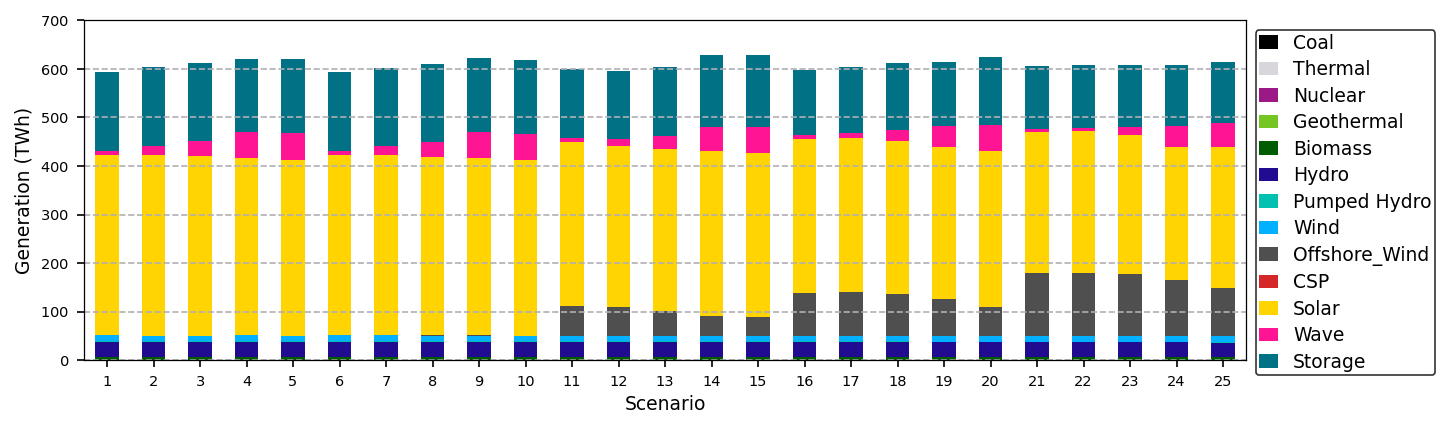

In [34]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = annual_gen_ca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

<ipython-input-102-8948144d2d2c>:47: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in California.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario,,,,,,,,,,,,,,
1,6.80,0.00,0.00,0.00,29.85,0.00,0.26,1.85,369.64,162.56,0.00,9.54,13.33,593.84
2,6.80,0.00,0.00,0.00,29.85,0.00,0.25,1.85,371.41,162.40,0.00,18.72,11.83,603.12
3,6.80,0.00,0.00,0.00,29.85,0.00,0.17,1.85,369.90,160.28,0.00,31.49,11.81,612.15
4,6.82,0.00,0.00,0.00,29.85,0.00,0.00,1.85,364.97,151.73,0.00,53.46,12.66,621.34
5,6.82,0.00,0.00,0.00,29.85,0.00,0.00,1.85,362.55,152.67,0.00,53.96,12.25,619.96
6,6.80,0.00,0.00,0.00,29.85,0.00,0.98,1.85,369.96,162.69,0.00,9.45,12.33,593.91
7,6.80,0.00,0.00,0.00,29.85,0.00,0.87,1.85,370.20,162.41,0.00,18.59,12.36,602.93
8,6.80,0.00,0.00,0.00,29.85,0.00,0.57,1.85,367.80,160.04,0.00,30.93,11.95,609.80
9,6.82,0.00,0.00,0.00,29.85,0.00,0.62,1.85,364.71,153.80,0.00,53.43,12.02,623.11


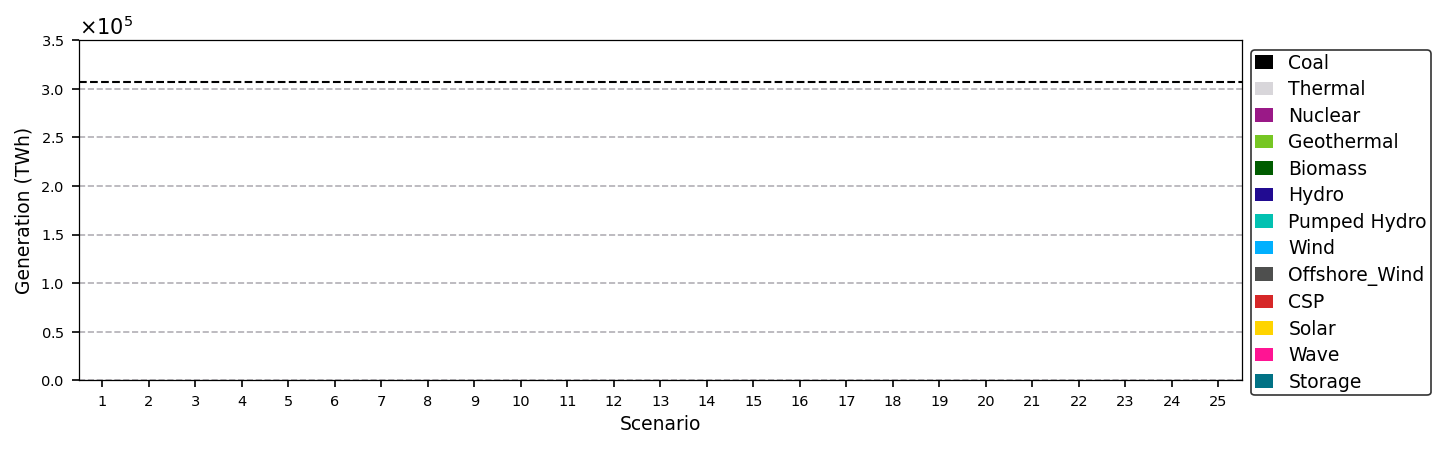

In [102]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = annual_gen_ca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

plt.axhline(y=total_load_ca_TWh, ls="--", color="k", lw=1)
#[total_load_ca_TWh].plot(kind='line', marker='*', color='black', ms=10)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) in California.png", transparent=False)

#Rename for spaces purposes
data=annual_gen_ca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) in California")

#Show dataframe
annual_gen_ca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(annual_gen_ca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(annual_gen_ca_by_scenario.columns)):
      x[c,tec]=100*annual_gen_ca_by_scenario.loc[scenario_name[c],annual_gen_ca_by_scenario.columns[tec]]/annual_gen_ca_by_scenario.loc[scenario_name[c],annual_gen_ca_by_scenario.columns[len(annual_gen_ca_by_scenario.columns)-1]]

annual_gen_ca_by_scenario_percentage=pd.DataFrame(x,columns=annual_gen_ca_by_scenario.columns,index=[scenario_name])

data=annual_gen_ca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Annual generation (percentage) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (percentage) in California")
annual_gen_ca_by_scenario_percentage

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario_190,1.04,0.00,0.00,0.00,5.14,0.00,38.83,0.32,35.87,15.87,0.00,1.06,1.87,100.00
scenario_191,1.04,0.00,0.00,0.00,5.16,0.00,38.50,0.32,35.08,15.64,0.00,2.24,2.01,100.00
scenario_192,1.05,0.00,0.00,0.00,5.19,0.00,38.40,0.32,33.73,15.36,0.00,3.86,2.08,100.00
scenario_193,1.04,0.00,0.00,0.00,5.13,0.00,38.03,0.32,33.09,14.81,0.00,5.29,2.29,100.00
scenario_194,1.04,0.00,0.00,0.00,5.15,0.00,37.91,0.32,33.06,14.52,0.00,5.95,2.06,100.00
scenario_195,1.07,0.00,0.00,0.00,5.12,0.00,35.85,0.32,37.13,16.65,0.00,1.62,2.24,100.00
scenario_196,1.05,0.00,0.00,0.00,5.19,0.00,37.25,0.32,35.15,15.71,0.00,2.88,2.45,100.00
scenario_197,1.05,0.00,0.00,0.00,5.19,0.00,38.69,0.32,33.32,15.03,0.00,4.21,2.18,100.00
scenario_198,1.04,0.00,0.00,0.00,5.13,0.00,39.28,0.32,32.45,14.42,0.00,5.32,2.05,100.00
scenario_199,1.03,0.00,0.00,0.00,5.11,0.00,40.17,0.32,31.46,14.00,0.00,5.90,2.01,100.00


## Annual generation out of California

In [ ]:
zones_ca=annual_summary[annual_summary ["scenario"].isin([scenario_name[0]])]
zones_ca=list(zones_ca[zones_ca.gen_load_zone.str.startswith('CA_')].gen_load_zone)
annual_gen_outca=annual_summary[~annual_summary["gen_load_zone"].isin(zones_ca)]
annual_gen_outca

,gen_tech,gen_load_zone,gen_energy_source,period,Energy_GWh_typical_yr,VariableOMCost_per_yr,DispatchEmissions_tCO2_per_typical_yr,DispatchEmissions_tNOx_per_typical_yr,DispatchEmissions_tSO2_per_typical_yr,DispatchEmissions_tCH4_per_typical_yr,tech_map,scenario,Energy_TWh
3,Battery_Storage,AZ_APS_E,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190,0.00
7,Battery_Storage,AZ_APS_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190,0.00
11,Battery_Storage,AZ_APS_SW,Electricity,2050,"5,935.20",0.00,0.00,0,0,0,Storage,scenario_190,5.94
15,Battery_Storage,AZ_NM_N,Electricity,2050,0.00,0.00,0.00,0,0,0,Storage,scenario_190,0.00
19,Battery_Storage,AZ_NW,Electricity,2050,"5,950.60",0.00,0.00,0,0,0,Storage,scenario_190,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Wind,WA_W,Wind,2050,736.31,0.00,0.00,0,0,0,Wind,scenario_199,0.74
3026,Wind,WY_NE,Wind,2050,985.84,0.00,0.00,0,0,0,Wind,scenario_199,0.99
3030,Wind,WY_NW,Wind,2050,"7,990.00",0.00,0.00,0,0,0,Wind,scenario_199,7.99
3034,Wind,WY_SE,Wind,2050,"112,620.00",0.00,0.00,0,0,0,Wind,scenario_199,112.62


In [ ]:
annual_gen_outca_by_scenario = annual_gen_outca.pivot_table(
    index="scenario", columns="tech_map", values="Energy_TWh", aggfunc=np.sum )

#Sort the pivot table by index according to the scenario_name
annual_gen_outca_by_scenario.columns = annual_gen_outca_by_scenario.columns.add_categories(['indexNumber'])
annual_gen_outca_by_scenario['indexNumber']=[scenario_name.index(annual_gen_outca_by_scenario.index[i]) for i in range(0,len(scenario_name))]
annual_gen_outca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del annual_gen_outca_by_scenario['indexNumber']
annual_gen_outca_by_scenario.columns = annual_gen_outca_by_scenario.columns.add_categories(['total_TWh'])
annual_gen_outca_by_scenario['total_TWh']=[annual_gen_outca_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario,,,,,,,,,,,,,,
scenario_190,8.47,0.00,0.00,0.00,208.00,42.76,68.93,0.86,338.47,119.85,0.04,1.39,425.99,"1,214.75"
scenario_191,8.47,0.00,0.00,0.00,208.00,42.76,64.56,0.86,338.88,120.59,0.04,5.58,426.66,"1,216.39"
scenario_192,8.47,0.00,0.00,0.00,208.00,42.76,58.69,0.86,334.19,116.78,0.04,14.97,427.63,"1,212.37"
scenario_193,8.47,0.00,0.00,0.00,208.00,42.76,58.12,0.86,323.94,115.15,0.04,21.02,421.09,"1,199.45"
scenario_194,8.47,0.00,0.00,0.00,208.00,42.76,60.04,0.86,326.47,116.68,0.04,22.74,414.78,"1,200.83"
scenario_195,8.47,0.00,0.00,0.00,208.00,42.76,46.27,0.86,342.61,119.15,0.04,3.54,447.01,"1,218.71"
scenario_196,8.47,0.00,0.00,0.00,208.00,42.76,51.08,0.86,331.54,116.67,0.04,7.24,447.23,"1,213.88"
scenario_197,8.47,0.00,0.00,0.00,208.00,42.76,56.20,0.86,326.82,114.47,0.04,13.93,434.39,"1,205.93"
scenario_198,8.18,0.00,0.00,0.00,208.00,42.76,65.70,0.86,323.27,116.18,0.04,20.98,412.44,"1,198.42"


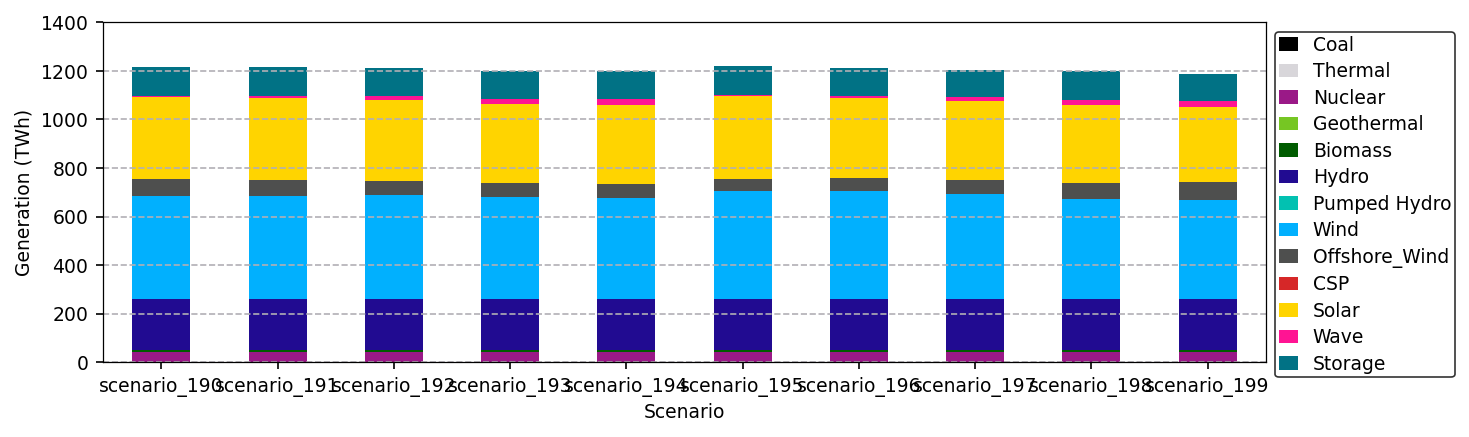

In [ ]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = annual_gen_outca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation (TWh)", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Annual generation (TWh) out of California.png", transparent=False)

#Rename for spaces purposes
data=annual_gen_outca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Annual generation (TWh) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (TWh) out of California")

#Show dataframe
annual_gen_outca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(annual_gen_outca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(annual_gen_outca_by_scenario.columns)):
      x[c,tec]=100*annual_gen_outca_by_scenario.loc[scenario_name[c],annual_gen_outca_by_scenario.columns[tec]]/annual_gen_outca_by_scenario.loc[scenario_name[c],annual_gen_outca_by_scenario.columns[len(annual_gen_outca_by_scenario.columns)-1]]

annual_gen_outca_by_scenario_percentage=pd.DataFrame(x,columns=annual_gen_outca_by_scenario.columns,index=[scenario_name])

data=annual_gen_outca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Annual generation (percentage) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Annual generation (percentage) out of California")
annual_gen_outca_by_scenario_percentage

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_TWh
scenario_190,0.70,0.00,0.00,0.00,17.12,3.52,5.67,0.07,27.86,9.87,0.00,0.11,35.07,100.00
scenario_191,0.70,0.00,0.00,0.00,17.10,3.52,5.31,0.07,27.86,9.91,0.00,0.46,35.08,100.00
scenario_192,0.70,0.00,0.00,0.00,17.16,3.53,4.84,0.07,27.56,9.63,0.00,1.23,35.27,100.00
scenario_193,0.71,0.00,0.00,0.00,17.34,3.57,4.85,0.07,27.01,9.60,0.00,1.75,35.11,100.00
scenario_194,0.71,0.00,0.00,0.00,17.32,3.56,5.00,0.07,27.19,9.72,0.00,1.89,34.54,100.00
scenario_195,0.69,0.00,0.00,0.00,17.07,3.51,3.80,0.07,28.11,9.78,0.00,0.29,36.68,100.00
scenario_196,0.70,0.00,0.00,0.00,17.13,3.52,4.21,0.07,27.31,9.61,0.00,0.60,36.84,100.00
scenario_197,0.70,0.00,0.00,0.00,17.25,3.55,4.66,0.07,27.10,9.49,0.00,1.15,36.02,100.00
scenario_198,0.68,0.00,0.00,0.00,17.36,3.57,5.48,0.07,26.97,9.69,0.00,1.75,34.42,100.00
scenario_199,0.68,0.00,0.00,0.00,17.53,3.60,6.19,0.07,26.31,9.41,0.00,1.87,34.33,100.00
